In [1]:
import numpy as np
import matplotlib.pyplot as plt
from getdist import plots, MCSamples
import sys
sys.path.append('../codes')
import modelfit

In [2]:
def plot(root, zbin):
    galaxy_sample_name = ['LOWZ', 'CMASS1', 'CMASS2'][zbin]

    # data
    sampler = modelfit.Sampler(zbin, use_model=True)
    ng, cov_ng, rp, wp, cov_wp = sampler.data[:5]
    std_wp = np.sqrt(np.diag(cov_wp))

    # posterior samples
    # Signal: the last element is the ng, and others are wp
    samples = np.loadtxt('../chains/{}-z{}-post_equal_weights-derived_signal.dat'.format(root, zbin))
    signal_post_mean= np.mean(samples, axis=0)
    signal_post_std = np.std(samples, axis=0)
    wp_post_mean = signal_post_mean[:-1]
    wp_post_std = signal_post_std[:-1]
    ng_post_mean = signal_post_mean[-1]
    ng_post_std = signal_post_std[-1]
    # HOD: the first half is Ncen and the second half is Nsat
    samples = np.loadtxt('../chains/{}-z{}-post_equal_weights-derived_hod.dat'.format(root, zbin))
    hod_post_mean = np.mean(samples, axis=0)
    hod_post_std = np.std(samples, axis=0)
    Ncen_post_mean = hod_post_mean[:hod_post_mean.size//2]
    Nsat_post_mean = hod_post_mean[hod_post_mean.size//2:]
    Ncen_post_std = hod_post_std[:hod_post_mean.size//2]
    Nsat_post_std = hod_post_std[hod_post_mean.size//2:]
    samples = samples[:, :Ncen_post_mean.size] + samples[:, Ncen_post_mean.size:]
    N_post_mean = np.mean(samples, axis=0)
    N_post_std = np.std(samples, axis=0)

    # compute the bestfit model
    wp_best, ng_best, Mh, Nc_best, Ns_best  = sampler.get_bestfit_predictions('../chains/{}-z{}-post_equal_weights.dat'.format(root, zbin))

    # plot result in signal space
    color ='C0'
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.errorbar(rp, rp*wp, rp*std_wp, fmt='.', color='k', label='data')
    ax.plot(rp, rp*wp_post_mean, color=color)
    ax.fill_between(rp, rp*(wp_post_mean - wp_post_std), rp*(wp_post_mean + wp_post_std), color=color, alpha=0.5)
    ax.plot(rp, rp*wp_best, color='r', ls='--', label='best-fit model')
    ax.set_xscale('log')
    ax.set_xlabel(r"$r_p$ [$h^{-1}$Mpc]", size = 15)
    ax.set_ylabel(r"$r_p w_p(r_p)$ [($h^{-1}{\rm Mpc})^2$]", size = 15)
    ax.set_title('{}'.format(galaxy_sample_name))
    ax.legend()

    left, bottom, width, height = [0.22, 0.17, 0.15, 0.2]
    ax_inset = fig.add_axes([left, bottom, width, height])
    ax_inset.ticklabel_format(scilimits = (-2, 2))
    ax_inset.errorbar(0, ng, np.sqrt(cov_ng), fmt = "o", color='k')
    plt.fill_between([-1,1], [ng_post_mean-ng_post_std]*2, [ng_post_mean+ng_post_std]*2, color=color, alpha = 0.5)
    ax_inset.scatter(0, ng_best, color='r', marker='x')
    ax_inset.set_xticklabels([])
    ax_inset.set_ylabel(r'$n_{\rm g}[(h^{-1}{\rm Mpc})^{-3}]$')
    plt.xlim(-5,5)
    # plt.ylabel(r"$n_g$ [($h^{-1}$Mpc)$^3$]", size = 15)
    plt.show()

    # plot contours
    samples, names = sampler.load_chain('../chains/{}-z{}-post_equal_weights.dat'.format(root, zbin))
    samples_best = samples[np.argmax(samples[:,-1]), :-1]
    print('BEST FIT PARAM estimated from post equal weight chain')
    print(dict(zip(names, samples_best)))
    s = MCSamples(samples=samples[:, :-1], names=names, ranges=modelfit.prior)
    g = plots.get_subplot_plotter()
    g.triangle_plot(s, filled=True, color=color, contour_args={'alpha':0.7}, markers=samples_best)
    plt.show()

    # plot hod
    plt.figure()
    plt.plot(Mh, Nc_best+Ns_best, color='C0', ls='-', label='central + satellite')
    plt.plot(Mh, Nc_best, color='C1', ls='-', label='central')
    plt.plot(Mh, Ns_best, color='C2', ls='-', label='satellite')
    plt.fill_between(Mh, N_post_mean-N_post_std, N_post_mean+N_post_std, color='C0', alpha=0.5)
    plt.fill_between(Mh, Ncen_post_mean-Ncen_post_std, Ncen_post_mean+Ncen_post_std, color='C1', alpha=0.5)
    plt.fill_between(Mh, Nsat_post_mean-Nsat_post_std, Nsat_post_mean+Nsat_post_std, color='C2', alpha=0.5)
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel(r"$M_h$ [$h^{-1}M_\odot$]", size = 15)
    plt.ylabel(r"$\langle N\rangle$", size = 15)
    plt.ylim(1e-2, 1e1)
    plt.grid()
    plt.legend()
    plt.show()

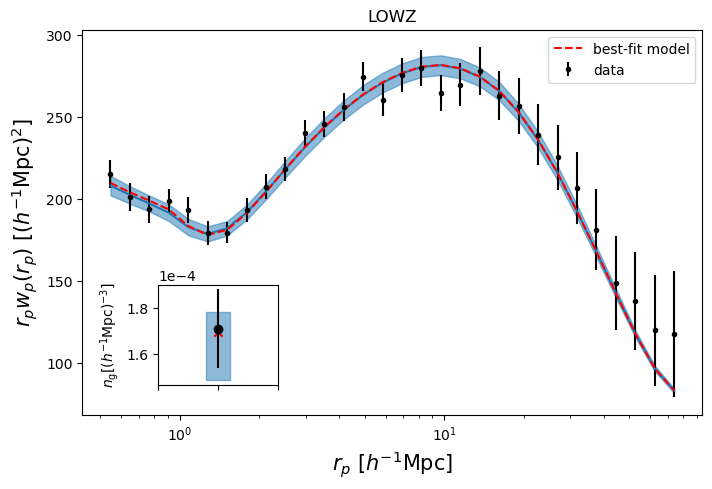

BEST FIT PARAM estimated from post equal weight chain
{'logMmin': 13.446406475700304, 'sigma_sq': 0.13804692825172615, 'logM1': 14.290300019536119, 'alpha': 0.5322034344463926, 'kappa': 2.9913249252992262}
Removed no burn in


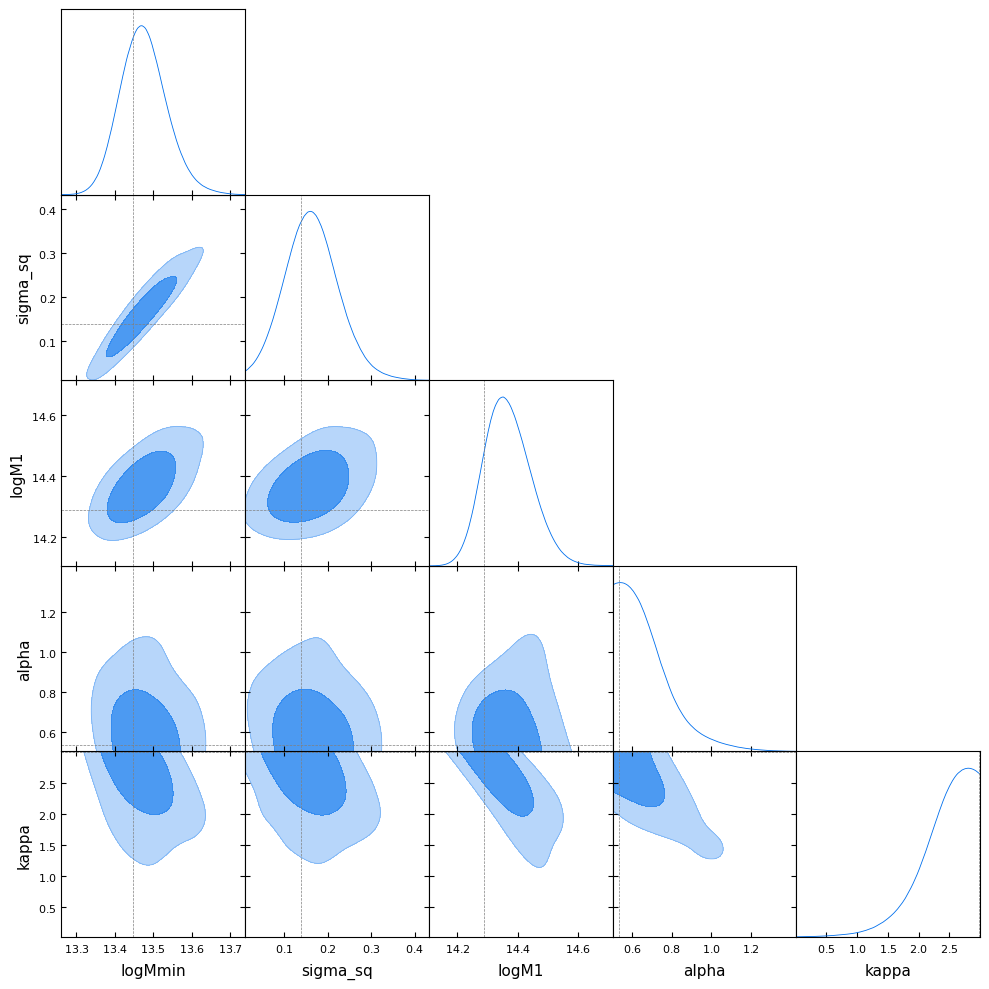

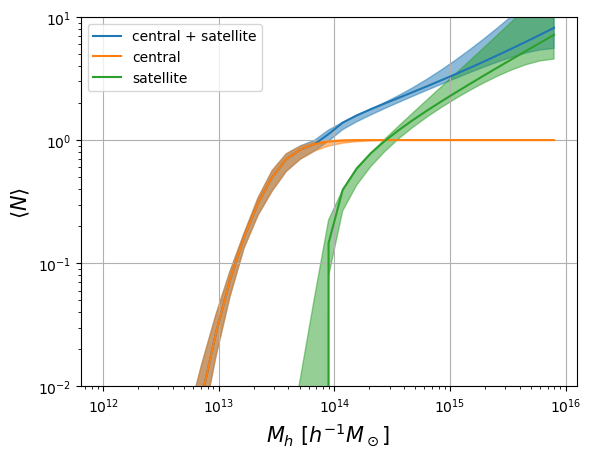

In [3]:
plot('wp-ng-fit-param5', 0)

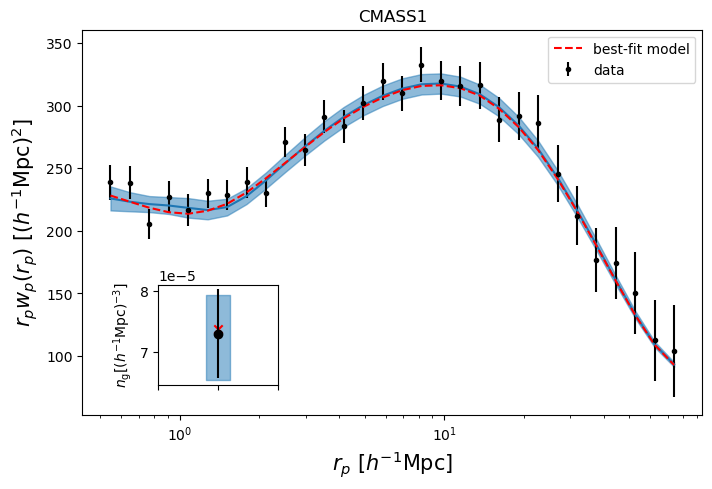

BEST FIT PARAM estimated from post equal weight chain
{'logMmin': 13.719848215166792, 'sigma_sq': 0.32093273845995435, 'logM1': 14.60064356829163, 'alpha': 1.7552105230375856, 'kappa': 0.24046807602303266}
Removed no burn in


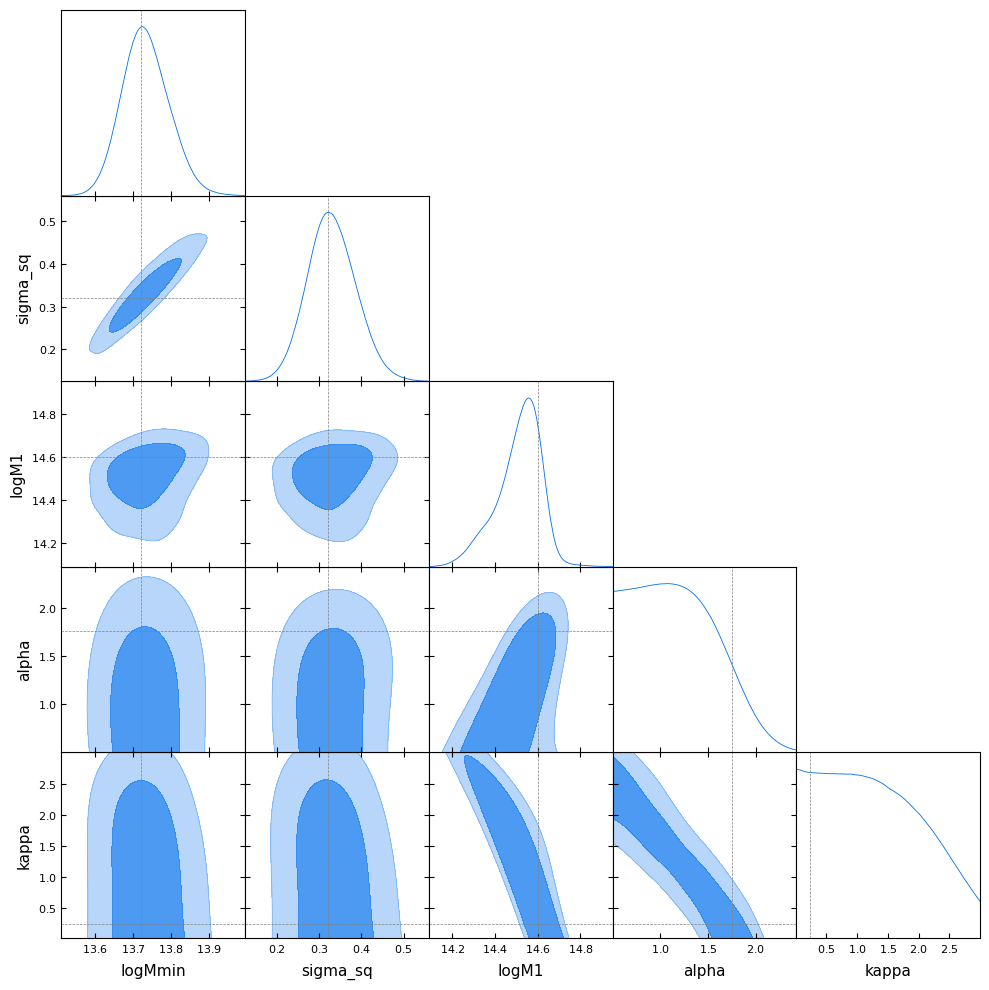

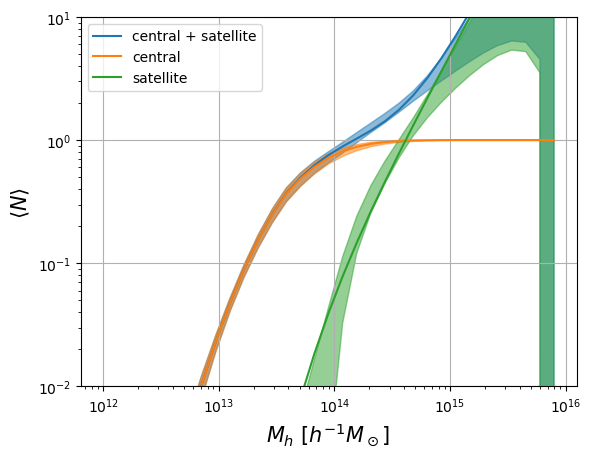

In [4]:
plot('wp-ng-fit-param5', 1)

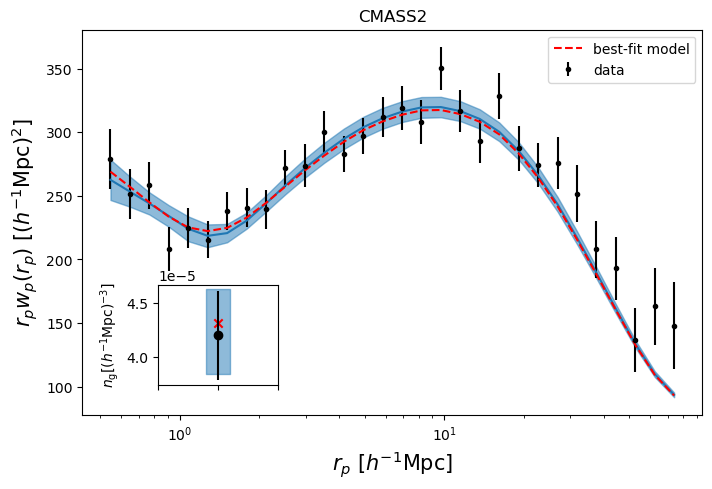

BEST FIT PARAM estimated from post equal weight chain
{'logMmin': 13.971552518615187, 'sigma_sq': 0.5313734173574514, 'logM1': 14.663491202537957, 'alpha': 1.756316674043216, 'kappa': 0.07199700215811579}
Removed no burn in


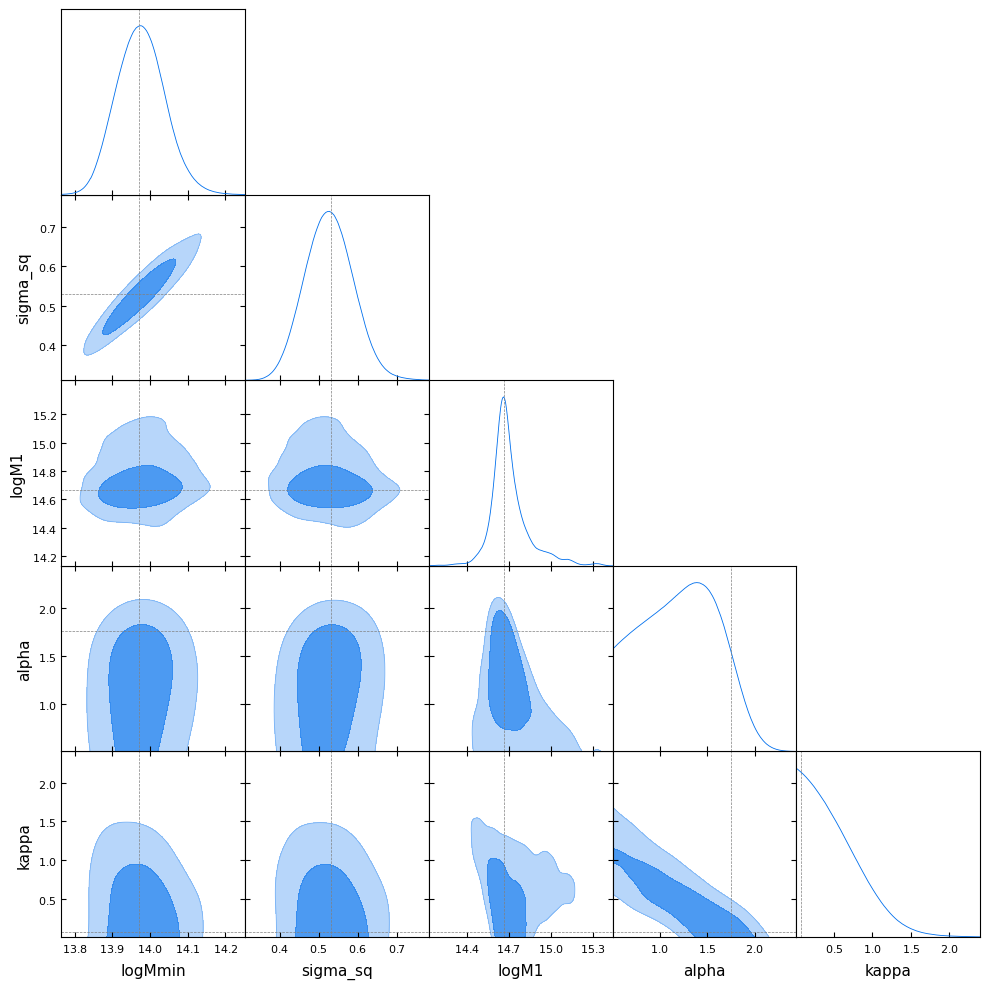

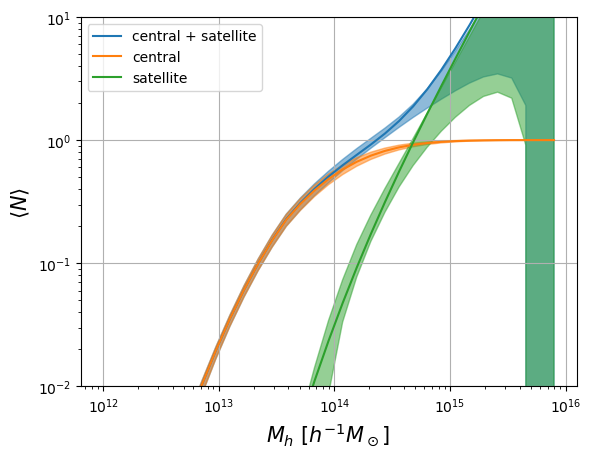

In [5]:
plot('wp-ng-fit-param5', 2)